# Alzheimer's Dataset Analysis

### What is Alzheimer's?

-Alzheimer's is the most common form of dementia that is known to affect cognitive functions, usually messing with behavior, memory, and thinking. As symptoms get worse, and slowly develop over time, things usually get severe enough for it to mess with daily tasks, thus typically leading to death.

-The most common cause of Alzheimer's is aging. As we get older, we have a higher risk of developing Alzheimer's. Typically people age 65 and older end up with Alzheimer's, although unfortunately that is not the case for everyone, as many people, ~200,000 have what we call early onset Alzheimer's or EOAD.

-Alzheimer's disease is currently the 6th leading cause of death in the United States, making it a disease of high concern. People who develop Alzheimer's typically live for 8 years, but can range from 4-20 years, depending on how severe the symptoms are.

-Currently there is no cure for Alzheimer's, but researchers are working hard to potentially find a cure for this death imminent disease. As of right now, we can slow the progression of the disease, helping people with the disease daily life be better, but we cannot fully cure it.

### Understanding the data
-The dataset includes the longitudinal collection of 150 samples aged 60 to 96. Each person had an mri scan done 2-3 times, for a total of 373 imaging sessions. 

-72 of the subjects were grouped as 'Nondemented' throughout the study.

-64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.

-14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

| COL  | Description                         |
|------|-------------------------------------|
| EDUC | Years of Education                  |
| SES  | Socioeconomic Status                |
| MMSE | Mini Mental State Examination       |
| CDR  | Clinical Dementia Rating            |
| eTIV | Estimated Total Intracranial Volume |
| nWBV | Normalize Whole Brain Volume        |
| ASF  | Atlas Scaling Factor                |

**Clinical Info:**
- MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
- CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
- Derived anatomic volumes
- eTIV - Estimated total intracranial volume, mm3
- nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
- ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Analyzing the data

In [6]:
#turn csv into pandas DataFrame using pd.read_csv
url = r'C:\Users\arung\oasis_longitudinal.csv'
df = pd.read_csv(url)
alzheimers_df = df.copy()
#describe the DataFrame
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [196]:
print('total rows and columns (rows,columns):',alzheimers_df.shape)

#first 5 rows of DataFrame
alzheimers_df.head()

total rows and columns (rows,columns): (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [143]:
#Showing count of null values in DataFrame
alzheimers_df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [299]:
#Filling null values with the mean and median of their columns
alzheimers_df["SES"].fillna(alzheimers_df["SES"].median(), inplace=True)
alzheimers_df["MMSE"].fillna(alzheimers_df["MMSE"].mean(), inplace=True)

# Graphically analyzing the data

C:\Users\arung\AppData\Local\Temp\ipykernel_17464\441577222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_df['Group'] = visit_df['Group'].replace(['Converted'], ['Demented'])


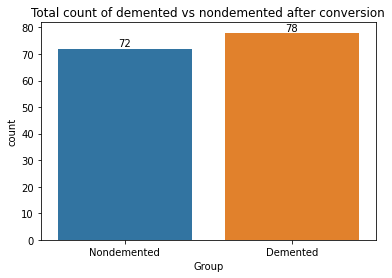

In [7]:
#Convert converted group into demented because they were later classified as demented.
visit_df = alzheimers_df.loc[alzheimers_df['Visit'] == 1]
visit_df['Group'] = visit_df['Group'].replace(['Converted'], ['Demented'])
alzheimers_df['Group'] = alzheimers_df['Group'].replace(['Converted'], ['Demented'])

ax = sns.countplot(x = 'Group', data = visit_df)
ax.bar_label(ax.containers[0])
plt.title('Total count of demented vs nondemented after conversion')
plt.show()

### This graph shows the total count of demented vs nondemented after 'converted' group was turned to demented because in the experiment they were later determined as demented. This shows that there were slightly more demented patients studied rather than nondemented.

              M   F
demented     40  38
nondemented  22  50


Text(0.5, 1.0, 'number of patients vs group')

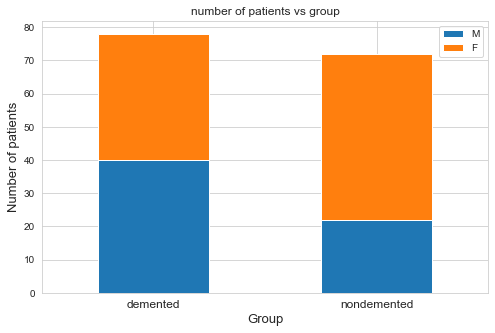

In [301]:
#Demented vs nondemented in males vs females
def bar_chart_sex(x):
    demented = visit_df[visit_df['Group']=='Demented'][x].value_counts()
    nondemented = visit_df[visit_df['Group']=='Nondemented'][x].value_counts()
    df_demented = pd.DataFrame([demented, nondemented])
    df_demented.index = ['demented', 'nondemented']
    df_demented.plot(kind='bar', stacked=True, figsize=(8,5))
    print(df_demented)

#Demented vs nondemented in males vs females graphed 
bar_chart_sex('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('number of patients vs group')

### This graph shows the number of demented and nondemented patients based off of gender. Although there were more females studied, there is a higher percentage of males that are seen as demented in comparison to females.

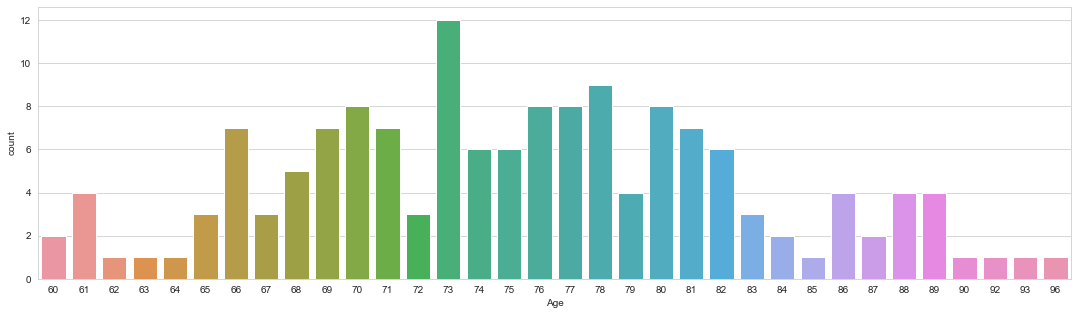

In [202]:
#countplot of ages in dataset
z = sns.countplot(x='Age', data = visit_df)
z.figure.set_size_inches(18.5, 5)

### This graph is a count graph based off of the number of patients seen vs age. This graph shows a higher number of patients in the 70-80 age range, which helps to show us that there is a higher percentage of people who have alzheimer's at that age, or are starting to develop it within that age range. Anyone older than that age range would most likely start dying from Alzheimer's, which is why there aren't as many patinets in their 90's.

(50.0, 100.0)

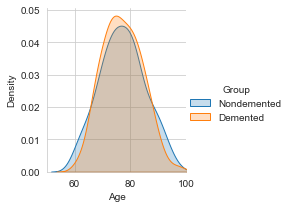

In [203]:
#Age in nondemented vs demented
facet = sns.FacetGrid(alzheimers_df, hue = 'Group')
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

### This graph is a KDE plot of group vs age. This graph helps to reinforce the idea above, that Alzheimer's is a disease that starts to develop around the 70-80 age group, and then they slowly start to die as they get older than that.

Text(0.5, 1.0, 'plot of age vs CDR')

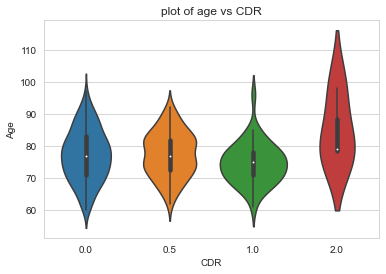

In [204]:
#violinplot of CDR vs Age
sns.violinplot(x='CDR', y='Age', data = alzheimers_df)
plt.title('plot of age vs CDR')

### This graph above is a violin plot of age vs CDR. This graph shows the median age is around 80 no matter the CDR, showing most people studied were within that same age range shown above.

In [206]:
#determining outlier in each column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369], dtype=int64),)
EDUC :  (array([107, 108, 109], dtype=int64),)
SES :  (array([], dtype=int64),)
MMSE :  (array([], dtype=int64),)
eTIV :  (array([0, 1], dtype=int64),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282], dtype=int64),)


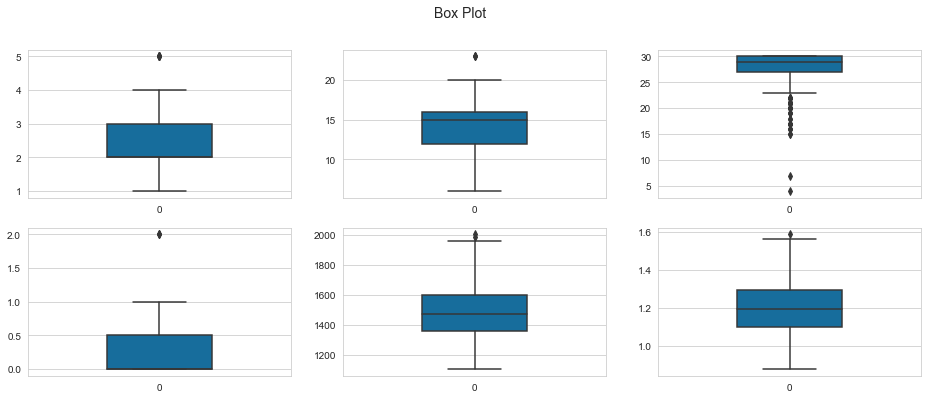

In [303]:
#boxplots showing the inner quartile range
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=alzheimers_df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=alzheimers_df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=alzheimers_df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=alzheimers_df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=alzheimers_df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=alzheimers_df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);

In [311]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

alzheimers_df['Group'] = alzheimers_df['Group'].map(group_map)
alzheimers_df['M/F'] = alzheimers_df['M/F'].replace(['F','M'], [0,1])

In [312]:
#corerlation map to show correlations between each column
def plot_correlation_map(df):
    corr = df.corr()
    x , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    x = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

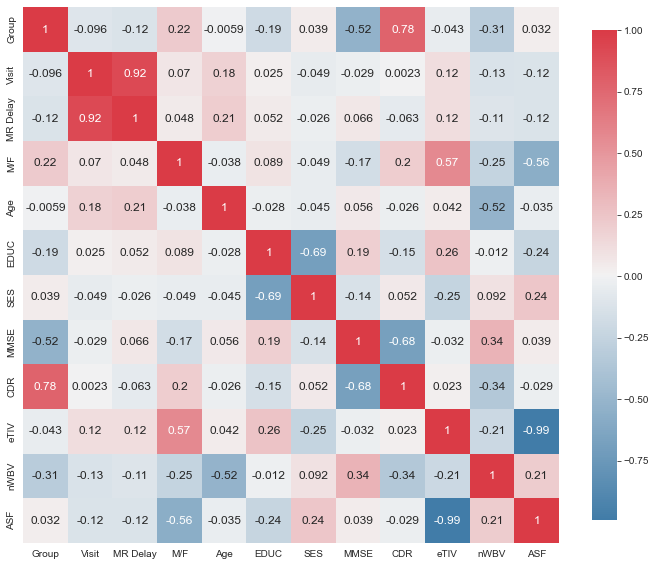

In [313]:
plot_correlation_map(alzheimers_df)

# Machine Learning

In [19]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [20]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

features = df[feature_col_names].values
group = df[predicted_class_names].values

features_train, features_test, group_train, group_test = train_test_split(features, group, test_size = 0.10, random_state = 42)

# K nearest neighbor classifier

Accuracy :  100.00
5 Cross fold validation scores:
[0.46666667 0.50666667 0.48       0.59459459 0.60810811]
Mean of cross fold validation:
0.5312072072072072


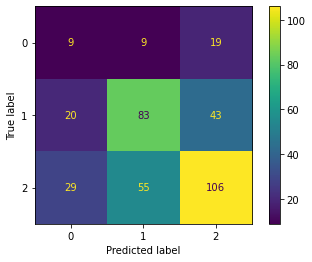

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(features, group)

#Accuracy Score
group_prdct_knn= knn.predict(features)
group_accuracy_knn = accuracy_score(group, group_prdct_knn)

print('Accuracy : ', "%.2f" % (group_accuracy_knn*100))

#5 Cross fold validation
knn_group = cross_val_score(knn, features, group, cv = 5)
print('5 Cross fold validation scores:')
print(knn_group)
print('Mean of cross fold validation:')
mean_knn = knn_group.mean()
print(mean_knn)

#Confusion Matrix
predict_knn = cross_val_predict(knn, features, group, cv = 5)
confusion_matrix_knn = metrics.confusion_matrix(group, predict_knn)
display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn)
display_knn.plot()
plt.grid(False)
plt.show()

# Gaussian Naive Bayes

Accuracy :  75.60
5 Cross fold validation scores:
[0.78666667 0.77333333 0.68       0.63513514 0.75675676]
Mean of cross fold validation:
0.7263783783783785


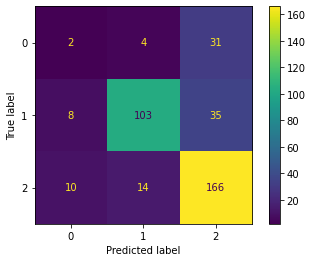

In [23]:
from sklearn.naive_bayes import GaussianNB

#Naive bayes Gaussian
GB_group = GaussianNB()
GB_group.fit(features, group)

#Accuracy Score
group_prdct_GB= GB_group.predict(features)
group_accuracy_GB = accuracy_score(group, group_prdct_GB)

print('Accuracy : ', "%.2f" % (group_accuracy_GB*100))

#5 Cross fold validation
model_group = cross_val_score(GB_group, features, group, cv = 5)
print('5 Cross fold validation scores:')
print(model_group)
print('Mean of cross fold validation:')
mean_GB = model_group.mean()
print(mean_GB)

#Confusion Matrix
predict_group = cross_val_predict(GB_group, features, group, cv = 5)
confusion_matrix_group = metrics.confusion_matrix(group, predict_group)
display_group = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group)
display_group.plot()
plt.grid(False)
plt.show()

# Support Vector Classifier

Accuracy :  77.21
5 Cross fold validation scores:
[0.77333333 0.74666667 0.68       0.71621622 0.7027027 ]
Mean of cross fold validation:
0.7237837837837838


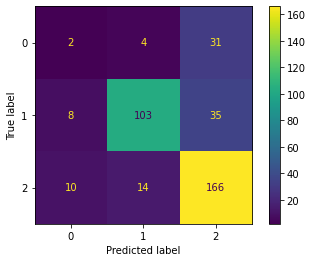

In [24]:
from sklearn.svm import SVC


#SVC
SVC_group = SVC(kernel='linear', C=10)
SVC_group.fit(features, group)


#Prediction for getting accuracy score
group_prdct_SVC= SVC_group.predict(features)
group_accuracy_SVC = accuracy_score(group, group_prdct_SVC)

print('Accuracy : ', "%.2f" % (group_accuracy_SVC*100))

#5 Cross fold validation
model_SVC = cross_val_score(SVC_group, features, group, cv = 5)
print('5 Cross fold validation scores:')
print(model_SVC)
print('Mean of cross fold validation:')
mean_SVC = model_SVC.mean()
print(mean_SVC)

#Confusion Matrix
predict_SVC = cross_val_predict(SVC_group, features, group, cv = 5)
confusion_matrix_SVC = metrics.confusion_matrix(group, predict_SVC)
display_SVC = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVC)
display_group.plot()
plt.grid(False)
plt.show()

# Random Forest Classifier

Accuracy :  97.05
5 Cross fold validation scores:
[0.76       0.74666667 0.64       0.74324324 0.74324324]
Mean of cross fold validation:
0.7266306306306307


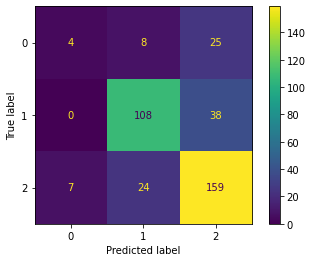

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#Creating RF
RF_group = RandomForestClassifier()
group_bagging = BaggingClassifier(RF_group, n_estimators = 100, max_samples = 0.8, random_state = 1)
group_bagging.fit(features, group)

#predicting data for accuracy score
group_RF = group_bagging.predict(features)
group_accuracy_RF = accuracy_score(group, group_RF)

#Accuracy score
print('Accuracy : ', "%.2f" % (group_accuracy_RF*100))

#5 Cross fold validation
model_RF = cross_val_score(group_bagging, features, group, cv = 5)
print('5 Cross fold validation scores:')
print(model_RF)
print('Mean of cross fold validation:')
mean_RF = model_RF.mean()
print(mean_RF)

#Confusion Matrix
predict_RF = cross_val_predict(group_bagging, features, group, cv = 5)
confusion_matrix_RF = metrics.confusion_matrix(group, predict_RF)
display_RF = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_RF)
display_RF.plot()
plt.grid(False)
plt.show()

# Principal Component Analysis

In [217]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#setting up PCA
scaler = StandardScaler()
X = scaler.fit_transform(features)
PCA = PCA(n_components = 2)
components = PCA.fit_transform(features)

#2D Biplot species
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.5/(xs.max() - xs.min())
    scaley = 1.5/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), color = 'black', va = 'center')
        else:
            plt.text(coeff[i,0], coeff[i,1], labels[i], color = 'k', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

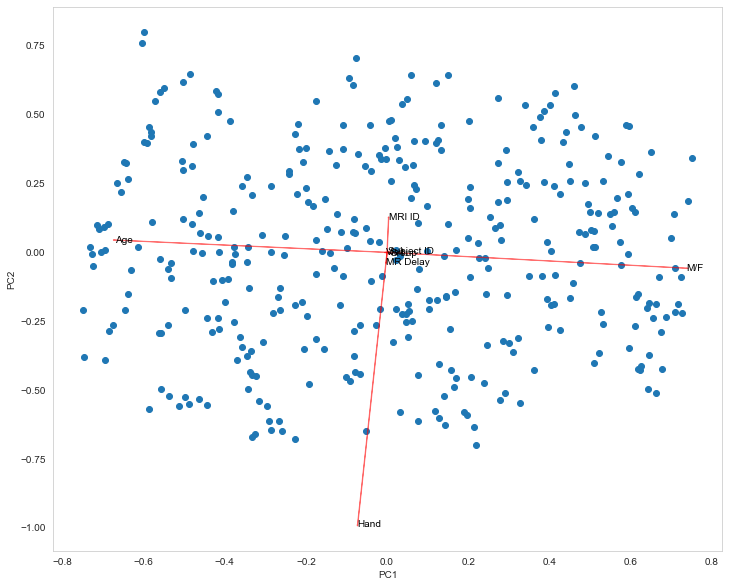

In [218]:
plt.figure(figsize=(12, 10))
biplot(components, np.transpose(PCA.components_), list(alzheimers_df.columns))

# Kmeans Clustering

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(features)
PCA_kmeans = PCA(n_components = 8)
df1 = PCA_kmeans.fit_transform(features)
df1.shape

(373, 8)

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8)
label = kmeans.fit_predict(df1)

print(label)

C:\Users\arung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[4 4 1 4 1 6 7 1 1 1 3 3 0 6 6 5 5 0 5 3 6 6 7 7 6 1 1 1 1 4 4 4 4 0 0 0 1
 1 1 4 4 3 3 6 6 0 2 3 3 3 3 5 1 3 0 3 3 0 0 2 6 6 2 2 2 2 3 6 3 3 3 3 2 2
 2 2 7 7 6 6 6 7 7 7 5 1 0 0 6 6 6 6 6 5 5 0 0 1 1 1 1 1 5 5 5 0 2 2 2 2 0
 2 5 5 6 6 3 3 0 0 5 5 5 6 6 6 0 0 1 1 1 1 1 1 0 0 2 2 2 4 4 0 0 0 0 0 2 2
 2 1 1 1 4 4 0 0 5 5 5 5 5 7 7 5 5 5 4 4 1 1 1 0 5 2 5 1 5 6 6 3 3 5 5 2 2
 2 2 0 0 5 5 5 5 2 3 0 5 0 4 4 4 7 7 1 1 0 3 5 5 5 5 5 3 0 3 2 2 2 0 0 0 1
 1 4 4 0 2 5 5 1 1 5 2 6 6 5 2 6 6 0 3 4 4 4 4 5 5 5 5 5 0 0 2 2 7 7 0 5 3
 3 3 1 1 1 1 1 3 3 2 2 2 3 3 2 2 7 7 1 1 1 1 7 7 3 3 0 0 0 7 7 3 3 4 4 4 1
 4 7 7 1 4 3 3 3 3 3 6 6 6 7 7 7 0 1 7 7 7 2 6 6 7 7 1 1 4 4 4 2 1 4 4 2 4
 0 0 4 4 4 4 4 3 3 3 4 4 4 0 0 0 0 5 5 5 5 1 1 7 7 7 1 1 5 5 5 5 3 6 1 1 1
 3 3 3]


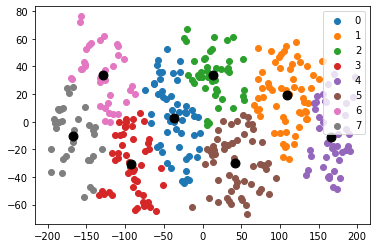

In [36]:
#Getting unique labels
 
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_ 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [37]:
#predicting data for accuracy score
group_kmeans = kmeans.predict(features)
group_accuracy_kmeans = accuracy_score(group, group_kmeans)

#Accuracy score
print('Accuracy : ', "%.2f" % (group_accuracy_kmeans*100))

Accuracy :  47.45


# Comparing all the accuracy scores of machine learning models

In [42]:
accuracy_scores = [group_accuracy_kmeans, mean_knn, group_accuracy_GB, group_accuracy_SVC, group_accuracy_RF]
df3 = pd.DataFrame()
df_results = df3.assign(Machine_Learning_Models=['Kmeans Clustering', 'K Nearest Neighbor','Gaussian Naive Bayes', 'Support Vector Classifier', 'Random Forest'])
df_results['Accuracy_Scores'] = accuracy_scores
df_results

,Machine_Learning_Models,Accuracy_Scores
0,Kmeans Clustering,0.474531
1,K Nearest Neighbor,0.531207
2,Gaussian Naive Bayes,0.756032
3,Support Vector Classifier,0.772118
4,Random Forest,0.970509
